<a href="https://colab.research.google.com/github/ChiliEater/mldm/blob/main/L02_Clustering_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
RANDOM_SEED = 0x0

# TASK 1 (3 Points): K-Means using scikit-learn

First we will generate some data. The variable `X` will contain the data used in this section.

In [3]:
from sklearn.datasets import make_blobs

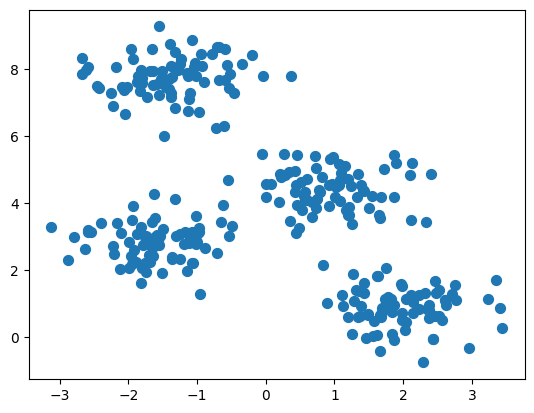

In [4]:
X, _ = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=.6,
    random_state=RANDOM_SEED,
)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 1a

Cluster the above data using the K-Means implementation provided by scikit-learn.
Refer to the official documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

* create an instance of the class `sklearn.cluster.KMeans`
* choose a suitable value for the `n_clusters` parameter
* call the `.fit` method to compute the clustering
* call the `.predict` method to get cluster labels for each data point

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=4)
labels = km.fit(X).predict(X)

/mnt/fast/chili/.local/share/virtualenvs/mldm-B4b5sYSz/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Task 1b

Visualize the resulting clustering.

* use the `plt.scatter` function (see: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html>)
* set the color parameter `c` to the cluster labels you computed above

* Optional: also plot the cluster centers (hint: call `plt.scatter` a second time, the cluster centers are stored in the `.cluster_centers_` member of the `KMeans` object)

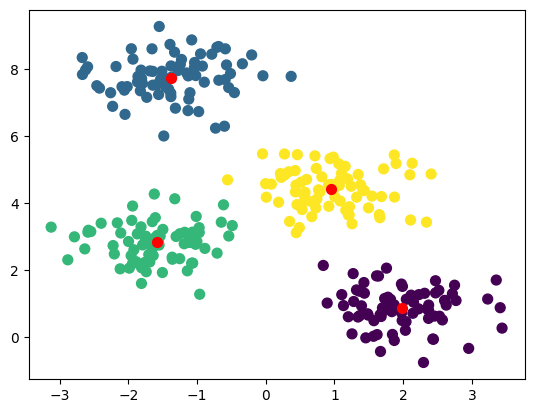

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c="red")

### Task 1c

Try different numbers of clusters and print the average silhouette scores using
`sklearn.metrics.silhouette_score`. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score>

* What does the silhouette score tell you?
* What conclusions do you draw from the numbers?


```
ANSWERS

1. How good the clustering actually is.
2. 4 Clusters is by far the best choice for n_clusters.
```

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
start = 2
end = 20

for i in range(start, end):
  km = KMeans(n_clusters=i, n_init="auto")
  labels = km.fit_predict(X)
  print(f"{i}: {silhouette_score(X, labels)}")

2: 0.5426422297358302
3: 0.5890390393551768
4: 0.6819938690643478
5: 0.5923875148758644
6: 0.4898649411941754
7: 0.404298273879667
8: 0.3177448182529565
9: 0.32879446322373673
10: 0.3449314549538787
11: 0.33738904192979774
12: 0.3388594086104274
13: 0.34856556081826473
14: 0.3673741887681089
15: 0.3543600641178895
16: 0.33187067812219956
17: 0.3644418597411464
18: 0.324415519040415
19: 0.35409442815913245


## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.

# TASK 2 (2 Points): DBSCAN

First, let's setup the data used in this section. We will redefine the variable `X` containing the data to be clustered.

In [10]:
from sklearn.datasets import make_moons

In [11]:
X, _ = make_moons(
    n_samples=200,
    noise=.05,
    random_state=RANDOM_SEED,
)

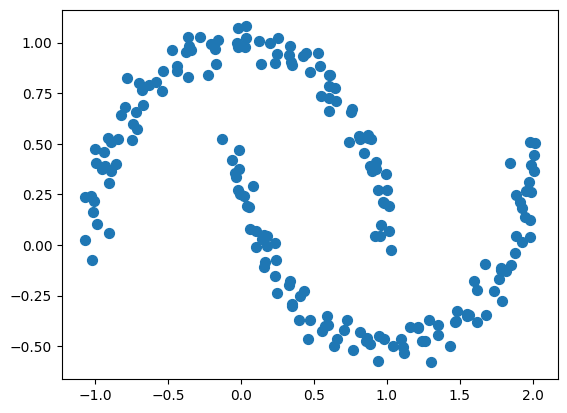

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=50)

### Task 2a

* cluster the new data `X` using `KMeans`
* set `n_clusters=2`
* visualize and analyse the resulting clustering
* What do you think of the result? Did something go wrong?

The clustering is not really useful. K-Means clusters data, by design, in a circle-like shape. K-Means fails when the distribution of the data is not in the shape of rough "blobs".

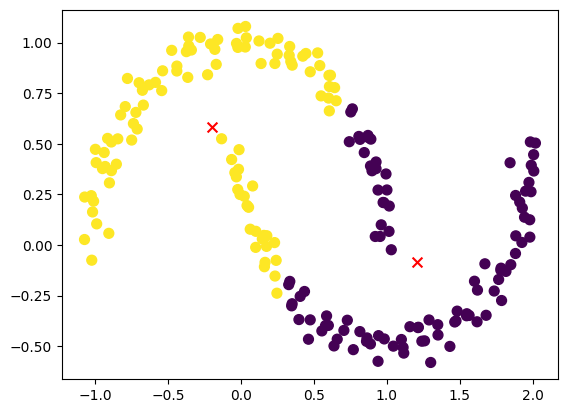

In [13]:
km = KMeans(n_clusters=2, n_init="auto")
labels = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c="red", marker="x")

### Task 2b

Let's use `sklearn.cluster.DBSCAN` instead. Refer to the documentation: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html>

* cluster the data using `DBSCAN`
* try different values for `eps` and `min_samples` until you can cluster the two half-moons

In [14]:
from sklearn.cluster import DBSCAN

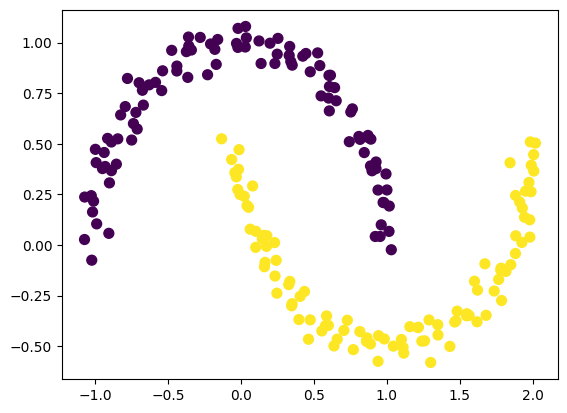

In [15]:
db = DBSCAN(eps=0.25, min_samples=2)
labels = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)

## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.